In [1]:
import pandas as pd
import numpy as np

In [2]:
# 950,970,450,480

In [4]:
(950+970+450+480)/4

712.5

In [5]:
x=(950,970,450,480)

In [6]:
np.mean(x)

712.5

In [7]:
np.std(x)

247.82806540018828

In [8]:
np.var(x)

61418.75

In [10]:
data=[6,7,8,12,13,13,15,16,19,22]

In [11]:
type(data)

list

In [12]:
import scipy.stats as stats

In [13]:
np.mean(data)

13.1

In [14]:
np.std(data)

4.90815647672321

In [15]:
z_score= (6- np.mean(data))/np.std(data)

In [16]:
z_score

-1.4465716473530426

In [17]:
stats.zscore(data)

array([-1.44657165, -1.24282916, -1.03908668, -0.22411673, -0.02037425,
       -0.02037425,  0.38711072,  0.59085321,  1.20208066,  1.81330812])

In [21]:
import seaborn as sns
import  warnings 
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

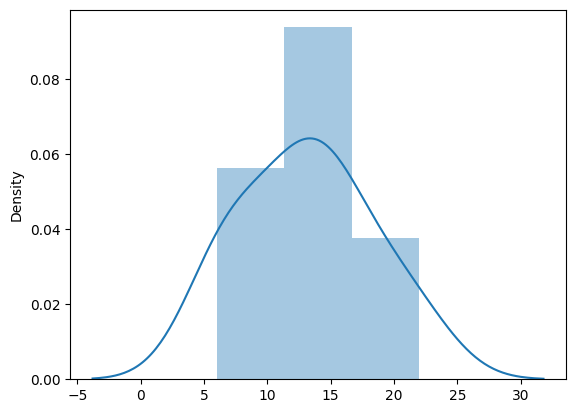

In [22]:
sns.distplot(data)

In [23]:
stats.norm.cdf(6,loc=13.1,scale=4.90)

0.07367164098034024

In [25]:
df=pd.read_csv("https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv")

In [26]:
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [27]:
x=df.salary

In [28]:
np.mean(x)

108023.78205128205

In [29]:
stats.mode(x)

ModeResult(mode=array([92000], dtype=int64), count=array([3]))

In [32]:
max(x)

186960

In [31]:
min(x)

57800

In [33]:
stats.mode(df)

ModeResult(mode=array([['Prof', 'B', 4, 3, 'Male', 92000]], dtype=object), count=array([[46, 42,  6,  7, 39,  3]]))

In [34]:
outliers= []

def detect_outliers(data):
    threshold=2
    mean=np.mean(data)
    std= np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
            

In [36]:
x= [1,2,3,4,5,6,7,100]

In [37]:
detect_outliers(x)

[100]

In [39]:
detect_outliers(df.salary)

[100, 186960]

In [43]:
df[df.salary!=186960]

,rank,discipline,phd,service,sex,salary
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


# IQR

In [44]:
data

[1, 2, 3, 4, 5, 6, 7, 100]

In [47]:
sorted(data)

[1, 2, 3, 4, 5, 6, 7, 100]

In [50]:
q1,q3=np.percentile(data,[25,75])

In [52]:
q1,q3

(2.75, 6.25)

In [53]:
iqr=q3-q1

In [54]:
iqr

3.5

In [55]:
lower_fence=q1-(1.5*iqr)

In [56]:
lower_fence

-2.5

In [57]:
higher_fence= q3+(1.5*iqr)

In [58]:
higher_fence

11.5

<AxesSubplot:>

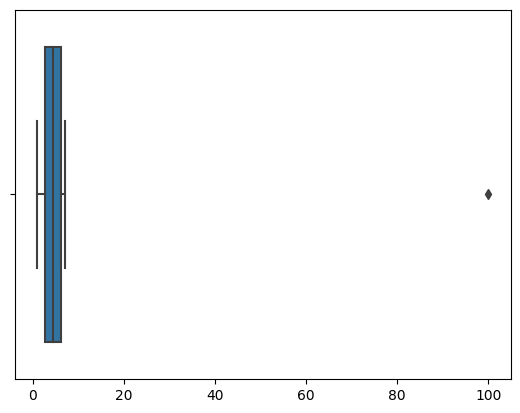

In [59]:
sns.boxplot(data)

In [68]:
detect_outlier(data)

[]

In [69]:
outlier_iqr=[]
def detect_outlier_iqr(data):
    q1,q3=np.percentile(data,[25,75])
    print(q1,q3)
    iqr=q3-q1
    print(iqr)
    lower_fence = q1-iqr
    higher_fence = q3+iqr
    print(lower_fence,higher_fence)
    for i in data:
        if i <lower_fence and i>higher_fence:
            outlier_iqr.append(i)
    return outlier_iqr